# O campo de gravidade Normal e o distúrbio de gravidade

Notebook que demonstrará o cálculo do distúrbio de gravidade. 

## Importando bibliotecas

Importando as bibliotecas que serão utilizadas para manipulação e visualização dos dados de gravidade.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import harmonica as hm
import pygmt 

In [2]:
import normal_gravity

## Carregando os dados do modelo geopotencial XGM2019e

Dados baixados do [*International Center for Global Earth Models* (ICGEM)](http://icgem.gfz-potsdam.de/home).

In [3]:
fname = 'dataset/earth_gravity_XGM2019e.gdf'

In [4]:
data = hm.load_icgem_gdf(fname)

In [5]:
data

<xarray.Dataset> Size: 1MB
Dimensions:        (latitude: 181, longitude: 361)
Coordinates:
  * longitude      (longitude) float64 3kB -180.0 -179.0 -178.0 ... 179.0 180.0
  * latitude       (latitude) float64 1kB -90.0 -89.0 -88.0 ... 88.0 89.0 90.0
Data variables:
    h_over_geoid   (latitude, longitude) float64 523kB 2.745e+03 ... 0.0
    gravity_earth  (latitude, longitude) float64 523kB 9.824e+05 ... 9.832e+05
Attributes: (12/32)
    generating_institute:  gfz-potsdam
    generating_date:       2023/03/22
    product_type:          gravity_field
    body:                  earth
    modelname:             XGM2019e_2159
    max_used_degree:       2190
    ...                    ...
    maxvalue:              9.8330378E+05 mgal
    minvalue:              9.7684704E+05 mgal
    signal_wrms:           1.5242402E+03 mgal
    grid_format:           long_lat_height_value
    attributes:            longitude latitude h_over_geoid gravity_earth
    attributes_units:      deg. deg. meter mgal

### Armazenando os dados em um array

In [6]:
lat = data.latitude
lon = data.longitude
elevation = data.h_over_geoid
gravity = data.gravity_earth

## Cálculo da gravidade Normal sobre a topografia

### Parâmetros do Elipsoide

In [7]:
a, f, GM, omega = normal_gravity.WGS84()

### Gravidade Normal sobre a topografia (Li and Götze,2001)

[Referência]

Li, X and Götze, H. Ellipsoid, geoid, gravity, geodesy, and geophysics. GEOPHYSICS 2001 66:6, 1660-1668. doi: https://doi.org/10.1190/1.1487109 

In [8]:
gamma = normal_gravity.closedform(a, f, GM, omega, lat, elevation)

In [9]:
gamma.max

<bound method DataArrayAggregations.max of <xarray.DataArray (latitude: 181, longitude: 361)> Size: 523kB
array([[982372.64935668, 982372.64935668, 982372.64935668, ...,
        982372.64935668, 982372.64935668, 982372.64935668],
       [982295.621067  , 982296.54478593, 982297.77641332, ...,
        982293.1578227 , 982294.38944367, 982295.621067  ],
       [982262.53529039, 982261.61161139, 982260.9958261 , ...,
        982263.76686443, 982263.15107708, 982262.53529039],
       ...,
       [983212.14942628, 983212.14942628, 983212.14942628, ...,
        983212.14942628, 983212.14942628, 983212.14942628],
       [983216.90720662, 983216.90720662, 983216.90720662, ...,
        983216.90720662, 983216.90720662, 983216.90720662],
       [983218.49378631, 983218.49378631, 983218.49378631, ...,
        983218.49378631, 983218.49378631, 983218.49378631]])
Coordinates:
  * latitude   (latitude) float64 1kB -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
  * longitude  (longitude) float64 3kB -180

### Visualização dos dados do elipsoide de referência

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


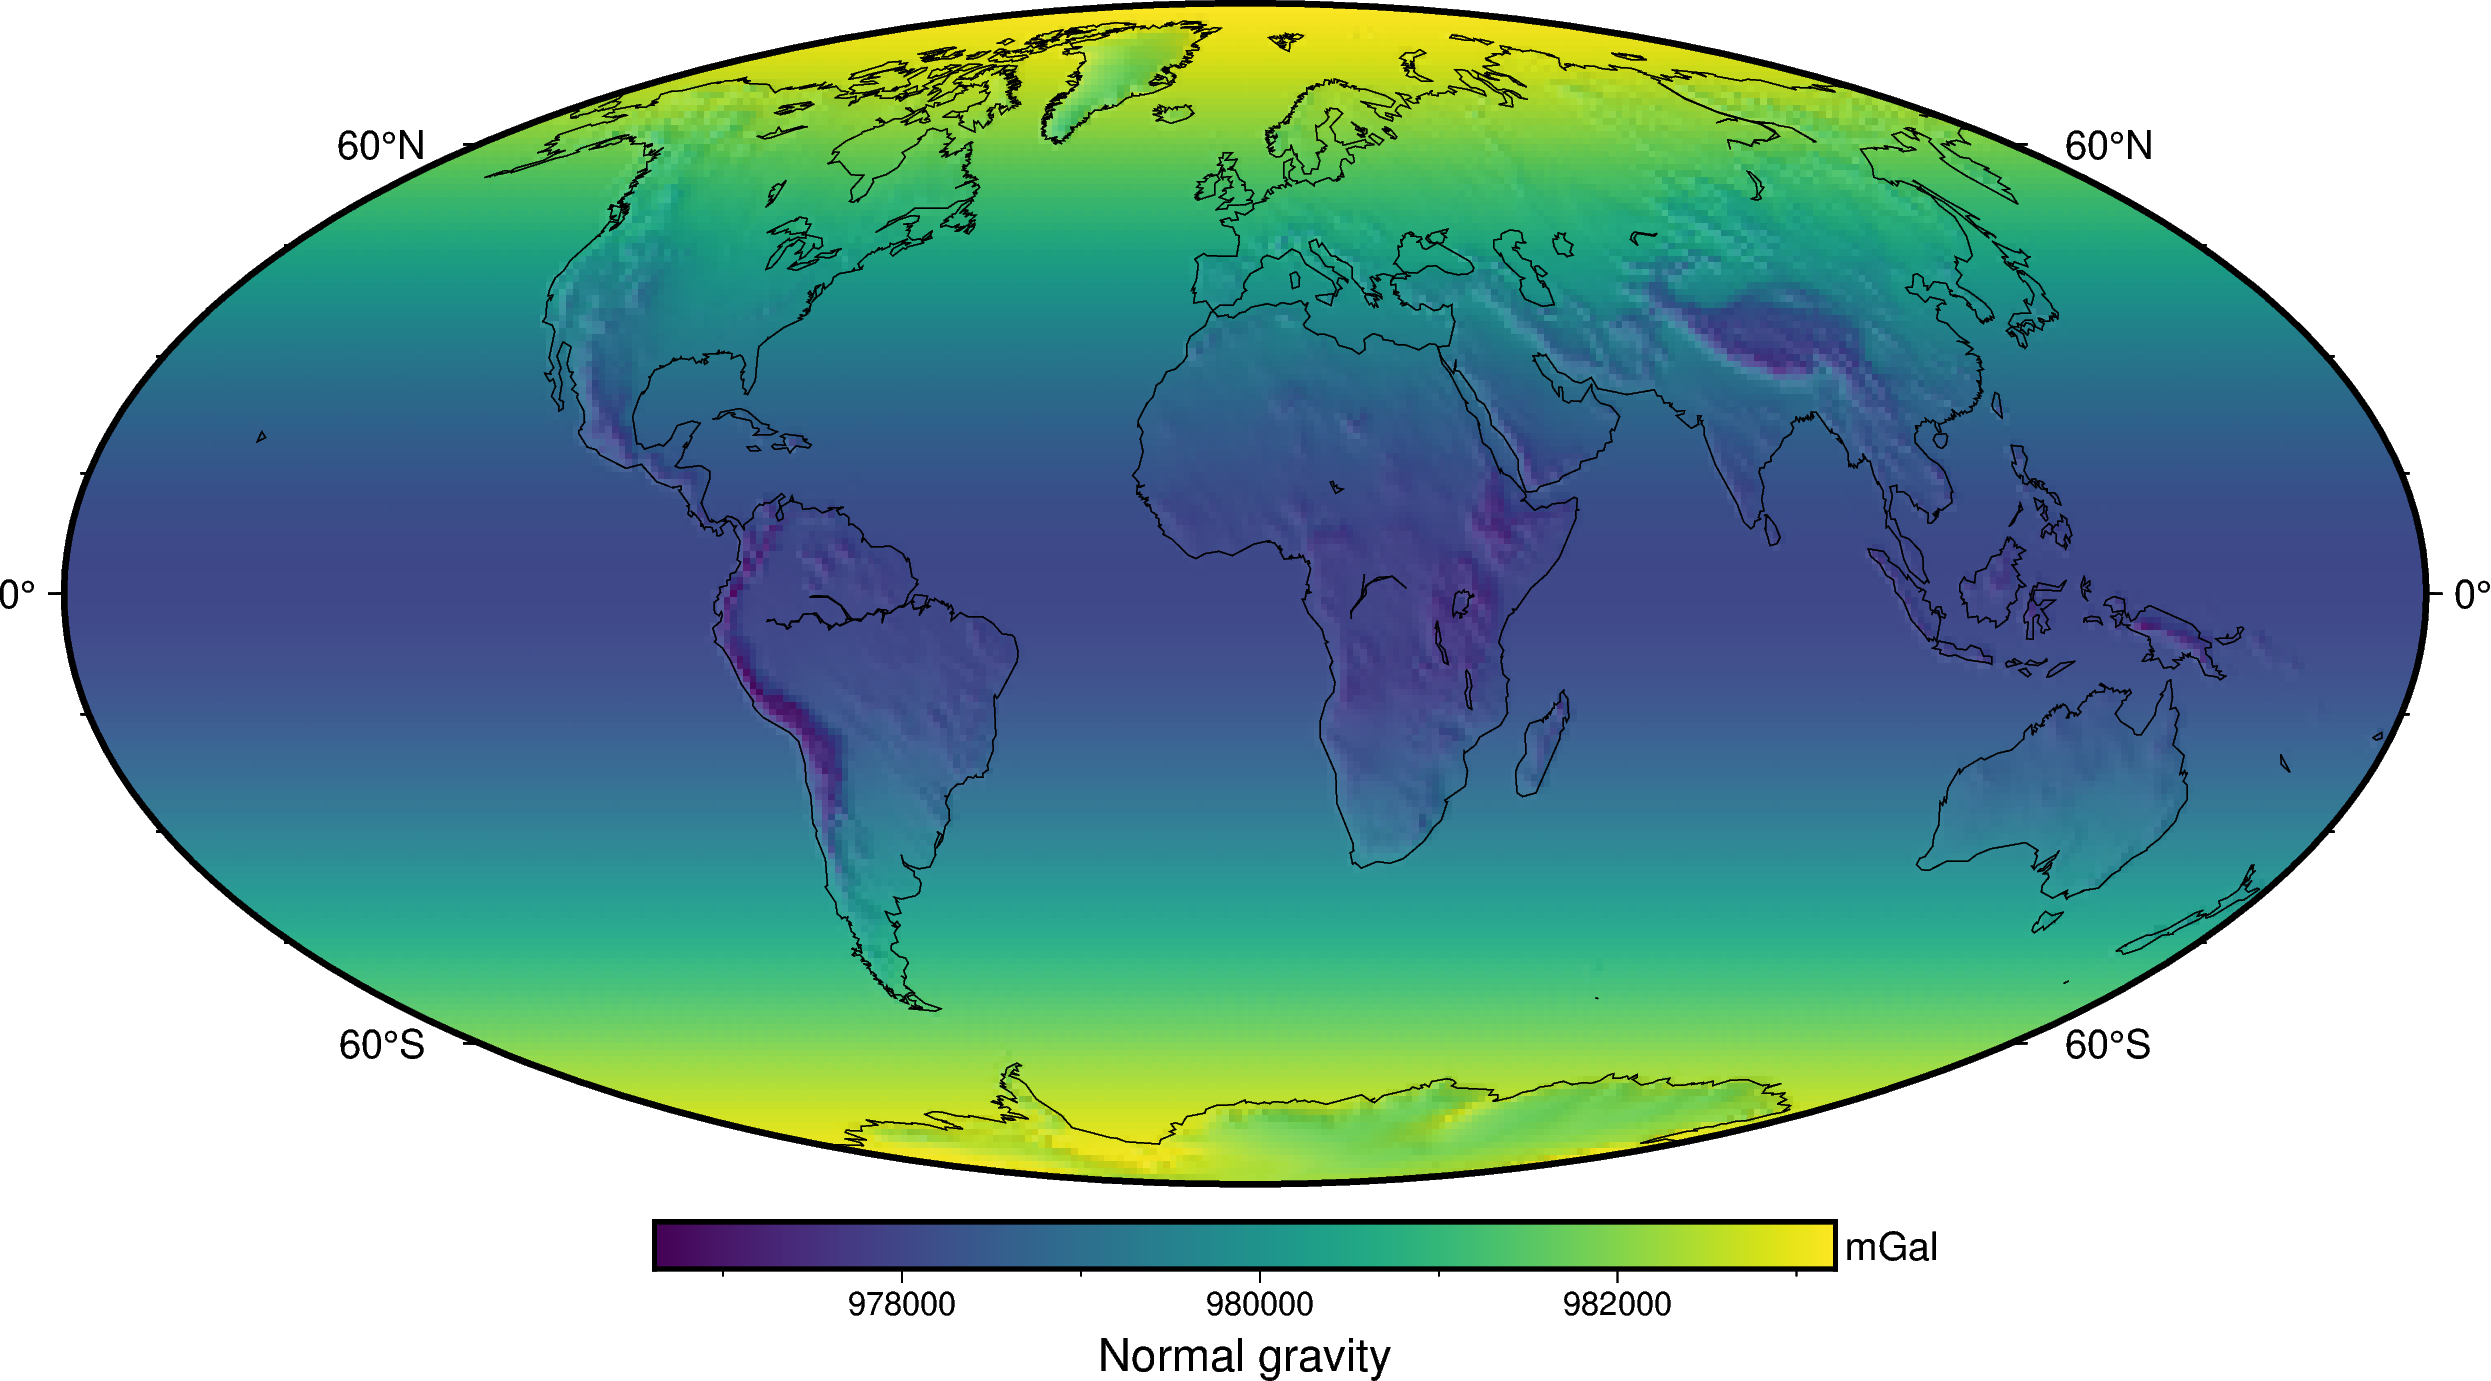

In [10]:
fig = pygmt.Figure()
fig.grdimage(
    gamma,
    projection="W20c",
    cmap="viridis",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', 'x+l"Normal gravity"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig('images/normal_gravity.png', dpi=300)
fig.show()


## Distúrbio de gravidade 

In [11]:
disturbance = gravity - gamma

In [12]:
disturbance

<xarray.DataArray (latitude: 181, longitude: 361)> Size: 523kB
array([[  3.0990429 ,   3.0990429 ,   3.0990429 , ...,   3.0990429 ,
          3.0990429 ,   3.0990429 ],
       [-31.7312155 , -31.10716422, -30.52825547, ..., -33.04428795,
        -32.38075494, -31.7312155 ],
       [ 40.60831959,  42.86282176,  44.53612818, ...,  34.13279804,
         37.57716378,  40.60831959],
       ...,
       [ 13.01231923,  19.59237169,  24.7218803 , ...,   3.19168241,
          7.02273603,  13.01231923],
       [ 10.58620723,  16.38567701,  22.02496078, ...,  -1.00374453,
          4.70192089,  10.58620723],
       [  6.97270048,   6.97270048,   6.97270048, ...,   6.97270048,
          6.97270048,   6.97270048]])
Coordinates:
  * longitude  (longitude) float64 3kB -180.0 -179.0 -178.0 ... 179.0 180.0
  * latitude   (latitude) float64 1kB -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


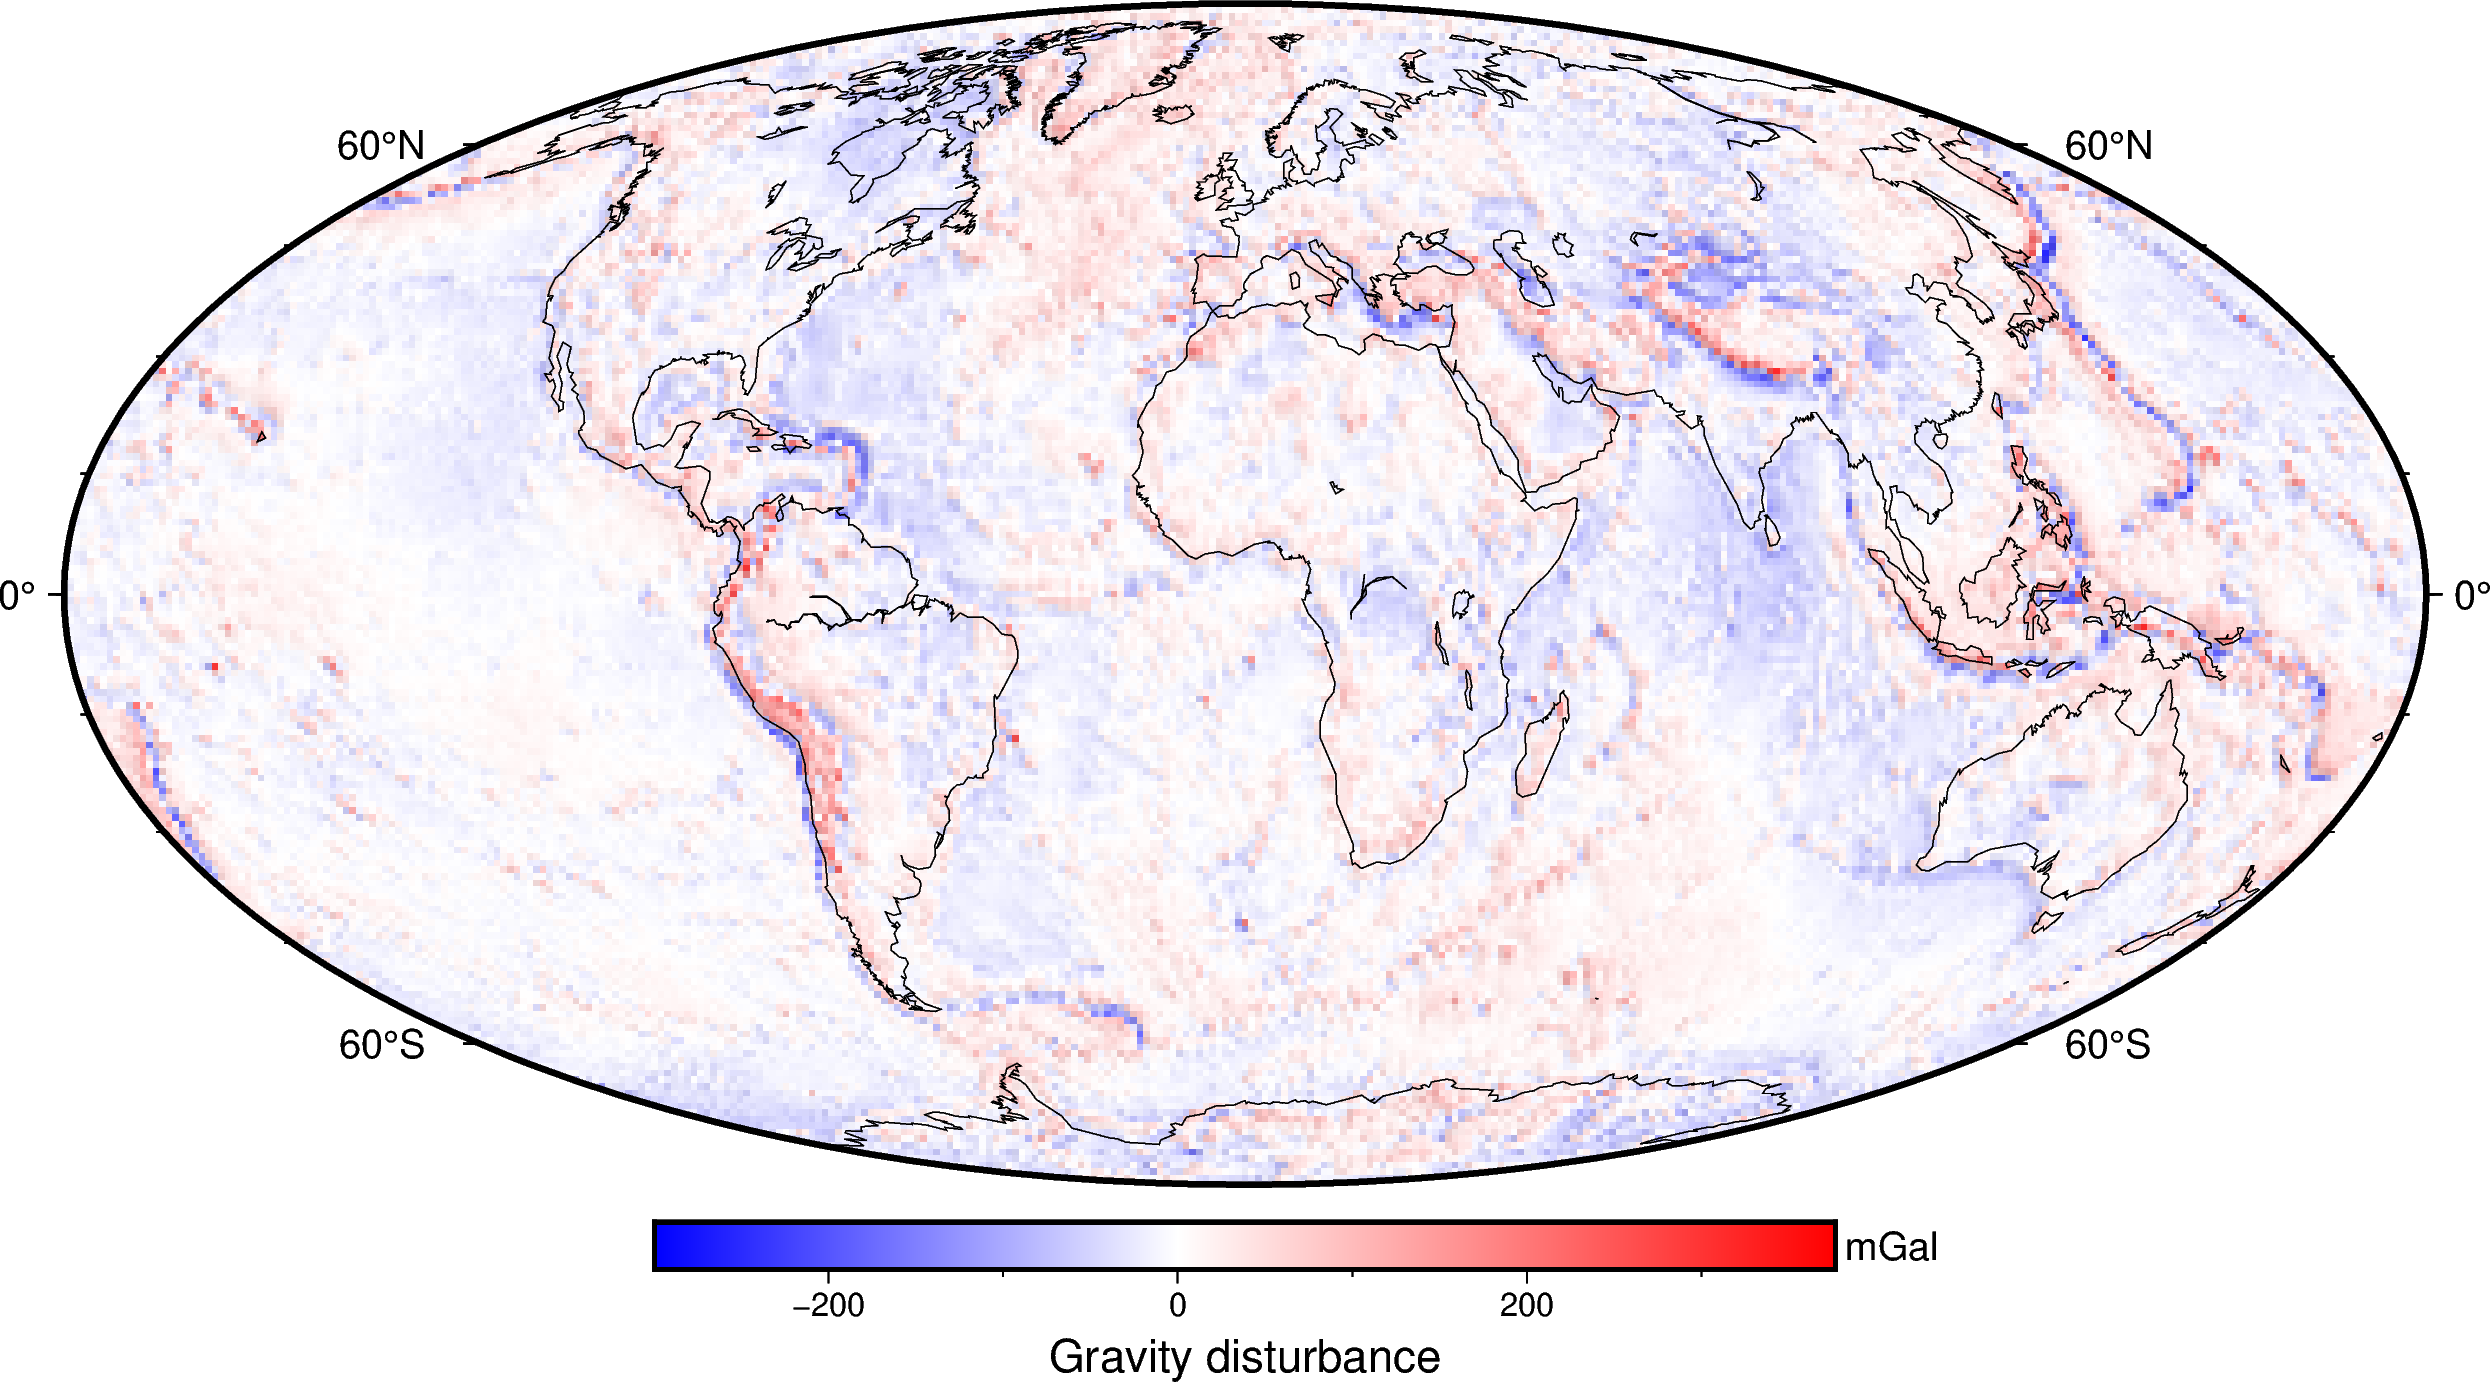

In [13]:
fig = pygmt.Figure()
fig.grdimage(
    disturbance,
    projection="W20c",
    cmap="polar+h",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', 'x+l"Gravity disturbance"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig('images/gravity_disturbance.png', dpi=300)
fig.show()